In [109]:
# Install Sastrawi package for Indonesian language processing
!pip install Sastrawi

# Install and download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


NLTK data path: ['C:\\Users\\ideapad/nltk_data', 'd:\\Anaconda3\\nltk_data', 'd:\\Anaconda3\\share\\nltk_data', 'd:\\Anaconda3\\lib\\nltk_data', 'C:\\Users\\ideapad\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


# Analisis Sentimen Komentar YouTube dengan Translasi dan VADER

Notebook ini melakukan analisis sentimen pada komentar YouTube dengan menggunakan model CNN. Proses meliputi:
1. Membaca data komentar YouTube
2. Mentranslate teks dari Bahasa Indonesia ke Bahasa Inggris
3. Melakukan analisis sentimen dengan VADER
4. Visualisasi hasil analisis
5. Membangun model CNN untuk klasifikasi sentimen

In [98]:
%pip install pandas nltk scikit-learn tensorflow matplotlib seaborn googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [99]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import pickle
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Library untuk Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from googletrans import Translator

# Download resource NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Library untuk Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set visualisasi
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 6)

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')
ignore_warnings = True

# Menentukan direktori penyimpanan
results_dir = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'results')
save_dir = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'model')

# Membuat direktori jika tidak ada
os.makedirs(results_dir, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# Path untuk menyimpan file hasil
csv_path = os.path.join(results_dir, 'youtube_comments_labeled_sentiment.csv')
excel_path = os.path.join(results_dir, 'youtube_comments_labeled_sentiment.xlsx')
binary_csv_path = os.path.join(results_dir, 'youtube_comments_binary_sentiment.csv')
binary_excel_path = os.path.join(results_dir, 'youtube_comments_binary_sentiment.xlsx')
distribution_path = os.path.join(results_dir, 'sentiment_distribution.csv')

# Set variabel STOPWORDS
STOPWORDS = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1. Membaca dan Eksplorasi Data

Pada tahap ini, kita akan membaca data komentar YouTube dari file CSV dan melakukan eksplorasi awal untuk memahami struktur dan isi datanya.

## Proses Translasi dan Analisis Sentimen

Dalam bagian ini, kita akan melakukan:
1. Translasi teks komentar dari Bahasa Indonesia ke Bahasa Inggris menggunakan Google Translate API
2. Melakukan analisis sentimen pada teks yang sudah ditranslasi menggunakan VADER
3. Menyimpan hasil analisis sentimen bersama dengan teks asli dan teks hasil translasi
4. Memvisualisasikan distribusi sentimen

Proses ini memungkinkan penggunaan VADER yang dikembangkan untuk teks Bahasa Inggris pada data Bahasa Indonesia.

In [101]:
# Membaca data komentar YouTube dari file CSV
file_path = '../youtubeScrapping/youtube_comments_20250618_235623.csv'
df = pd.read_csv(file_path)

# Menampilkan informasi dasar tentang data
print(f"Jumlah baris data: {df.shape[0]}")
print(f"Jumlah kolom data: {df.shape[1]}")
print("\nInformasi kolom:")
print(df.info())

# Menampilkan beberapa baris pertama dari data
print("\nContoh data:")
df.head()

Jumlah baris data: 8000
Jumlah kolom data: 12

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          8000 non-null   object 
 1   text         8000 non-null   object 
 2   time         8000 non-null   object 
 3   author       7996 non-null   object 
 4   channel      8000 non-null   object 
 5   votes        8000 non-null   object 
 6   replies      431 non-null    float64
 7   photo        8000 non-null   object 
 8   heart        8000 non-null   bool   
 9   reply        8000 non-null   bool   
 10  time_parsed  8000 non-null   float64
 11  paid         2 non-null      object 
dtypes: bool(2), float64(2), object(8)
memory usage: 640.8+ KB
None

Contoh data:


,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,paid
0,Ugx4yXCnj2EwazlGf2x4AaABAg,10 huta gumanoid didunia ini. Dunia akan musna...,1 menit yang lalu,@strausssgirl6972,UCSra3ITJw3av95scOfePjag,0,NaN,https://yt3.ggpht.com/MLkWr8RuFAywZ-JXXPAwfakc...,False,False,1.750265e+09,NaN
1,Ugzq0J9PWkPpENSd8yB4AaABAg,"Emang riba menyengsarakan ,tapi bagaimana den...",3 menit yang lalu,@yogihamdani5732,UCq1GywWyqsUCKL14xtFbEgA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_lbCYlbm7O2ObX8...,False,False,1.750265e+09,NaN
2,Ugxl_CLf6mZo19_n8Zd4AaABAg,Terkesan Om Ded gk mau kalah pinter dg Bro Tim,3 menit yang lalu,@SusterAna,UCO2T5O00MWYJJbc9AAQGjZA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_kN0vHjIDhTA7B0...,False,False,1.750265e+09,NaN
3,UgyzX0RKcVquUhpq4Xl4AaABAg,Bangggaa bgnet sama timoti,4 menit yang lalu,@youkoudua4502,UC32fF0Sr-ovPRS5UngLQt9Q,0,NaN,https://yt3.ggpht.com/Fl5FqGZ7cQWEG8hmKeHG5OOr...,False,False,1.750265e+09,NaN
4,UgwtGR91l5aUisszZFF4AaABAg,"Ronald klw ngomong yg enk2 nya ajh, lu mah enk...",5 menit yang lalu,@justinbibirmonyong8371,UCiGLLfMAB50ZEYq9LmdgTWQ,0,NaN,https://yt3.ggpht.com/cVbwJa7NPShwN3DdAMvDp33k...,False,False,1.750265e+09,NaN


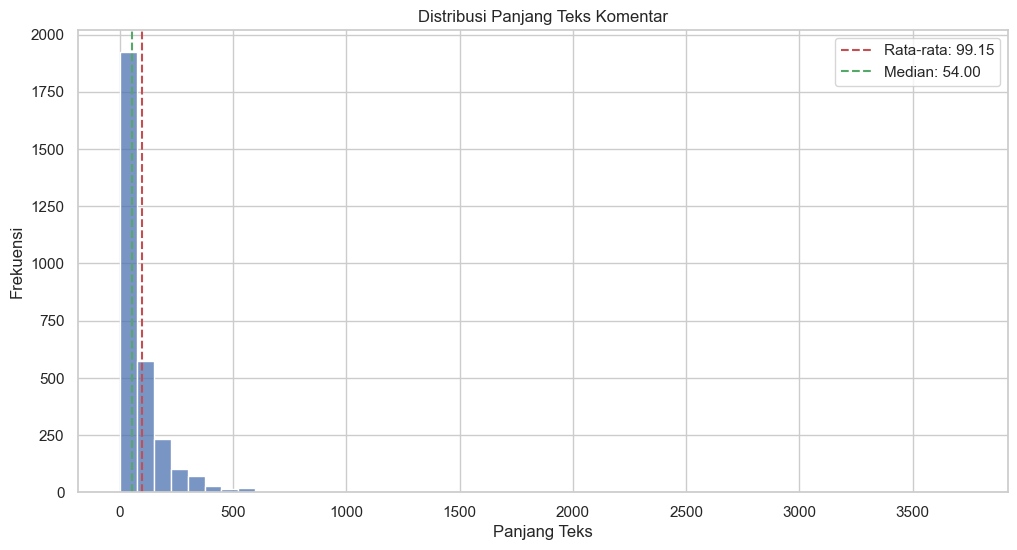

Statistik panjang teks komentar:
count    3000.000000
mean       99.146667
std       176.189974
min         1.000000
25%        29.000000
50%        54.000000
75%       107.000000
max      3733.000000
Name: text_length, dtype: float64


In [87]:
# Analisis distribusi panjang teks komentar
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribusi Panjang Teks Komentar')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.axvline(df['text_length'].mean(), color='r', linestyle='--', label=f'Rata-rata: {df["text_length"].mean():.2f}')
plt.axvline(df['text_length'].median(), color='g', linestyle='--', label=f'Median: {df["text_length"].median():.2f}')
plt.legend()
plt.show()

# Menampilkan statistik dari panjang teks
print(f"Statistik panjang teks komentar:")
print(df['text_length'].describe())

## 2. Pelabelan Dataset menggunakan VADER

Kita akan menggunakan VADER (Valence Aware Dictionary and sEntiment Reasoner) untuk memberikan label sentimen pada komentar YouTube secara otomatis. VADER adalah alat analisis sentimen berbasis leksikon yang dirancang khusus untuk sentimen yang diungkapkan dalam media sosial. Untuk komentar berbahasa Indonesia, kita akan melakukan pelabelan langsung tanpa melakukan proses terjemahan seperti yang dilakukan pada notebook getcontact.

Distribusi Sentimen:
sentiment
Netral     2564
Positif     345
Negatif      91
Name: count, dtype: int64


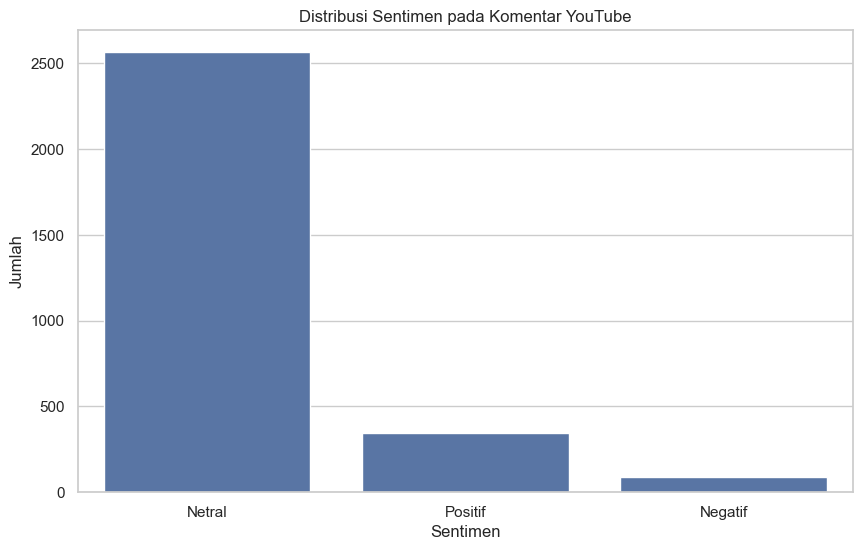


Contoh komentar dengan sentimen positif:
                                    text  compound_score
5                            Top is near          0.2023
8   Love timothy dan om botak kaya leci❤          0.6369
11                        hahaha 🤑💸💵💴💶💰💳          0.5574

Contoh komentar dengan sentimen netral:
                                        text  compound_score
0                                          😊             0.0
1  kek beda banget isi nya ama podcast densu             0.0
2           Timothy keren banget sih 🎉🎉🎉🎉🎉🎉🎉             0.0

Contoh komentar dengan sentimen negatif:
                                                                                                                       text  compound_score
13   2 orang cerdas saling bertukar pikiran dalam satu meja, pikiran ane masih nge lag ngikutin beberapa maksud dari mereka         -0.3400
94                                                  Lo tau gak sih, temen gue resign gara-gara keasyikan sama ⚡METROWIN𝟾𝟪⚡?

In [88]:
# Fungsi untuk menganalisis sentimen menggunakan VADER
def analyze_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    compound_score = scores["compound"]
    
    # Klasifikasi berdasarkan compound score
    if compound_score >= 0.05:
        return "Positif"
    elif compound_score <= -0.05:
        return "Negatif"
    else:
        return "Netral"

# Menerapkan analisis sentimen pada kolom teks
df['sentiment'] = df['text'].apply(analyze_sentiment_vader)

# Menyimpan skor sentimen untuk analisis lebih detail
def get_sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

# Mendapatkan skor sentimen untuk setiap teks
sentiment_scores = df['text'].apply(get_sentiment_scores)

# Menambahkan skor sentimen sebagai kolom baru di dataframe
df['pos_score'] = sentiment_scores.apply(lambda x: x['pos'])
df['neg_score'] = sentiment_scores.apply(lambda x: x['neg'])
df['neu_score'] = sentiment_scores.apply(lambda x: x['neu'])
df['compound_score'] = sentiment_scores.apply(lambda x: x['compound'])

# Menampilkan distribusi sentimen
sentiment_counts = df['sentiment'].value_counts()
print("Distribusi Sentimen:")
print(sentiment_counts)

# Visualisasi distribusi sentimen   
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribusi Sentimen pada Komentar YouTube')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

# Menampilkan contoh komentar untuk setiap kategori sentimen
print("\nContoh komentar dengan sentimen positif:")
print(df[df['sentiment'] == 'Positif'][['text', 'compound_score']].head(3).to_string())

print("\nContoh komentar dengan sentimen netral:")
print(df[df['sentiment'] == 'Netral'][['text', 'compound_score']].head(3).to_string())

print("\nContoh komentar dengan sentimen negatif:")
print(df[df['sentiment'] == 'Negatif'][['text', 'compound_score']].head(3).to_string())

## 3. Pra-pemrosesan Teks dan Visualisasi

Sebelum membangun model, kita perlu melakukan pra-pemrosesan teks untuk membersihkan dan mengubah data teks menjadi format yang sesuai untuk model CNN. Langkah-langkah ini termasuk:

1. Membersihkan teks (menghilangkan karakter khusus, URL, dsb)
2. Mengubah teks menjadi huruf kecil
3. Menghapus stopwords
4. Tokenisasi
5. Padding untuk menyeragamkan panjang teks

Kita juga akan memvisualisasikan data sebelum dan sesudah preprocessing untuk melihat perbedaannya, menggunakan:
- Word Cloud (awan kata) untuk melihat kata-kata yang paling sering muncul
- Distribusi frekuensi kata sebelum dan sesudah preprocessing

### 3.1 Visualisasi Sebelum Pra-pemrosesan

Data teks komentar sebelum melakukan pra-pemrosesan untuk melihat distribusi kata-kata yang paling sering muncul.

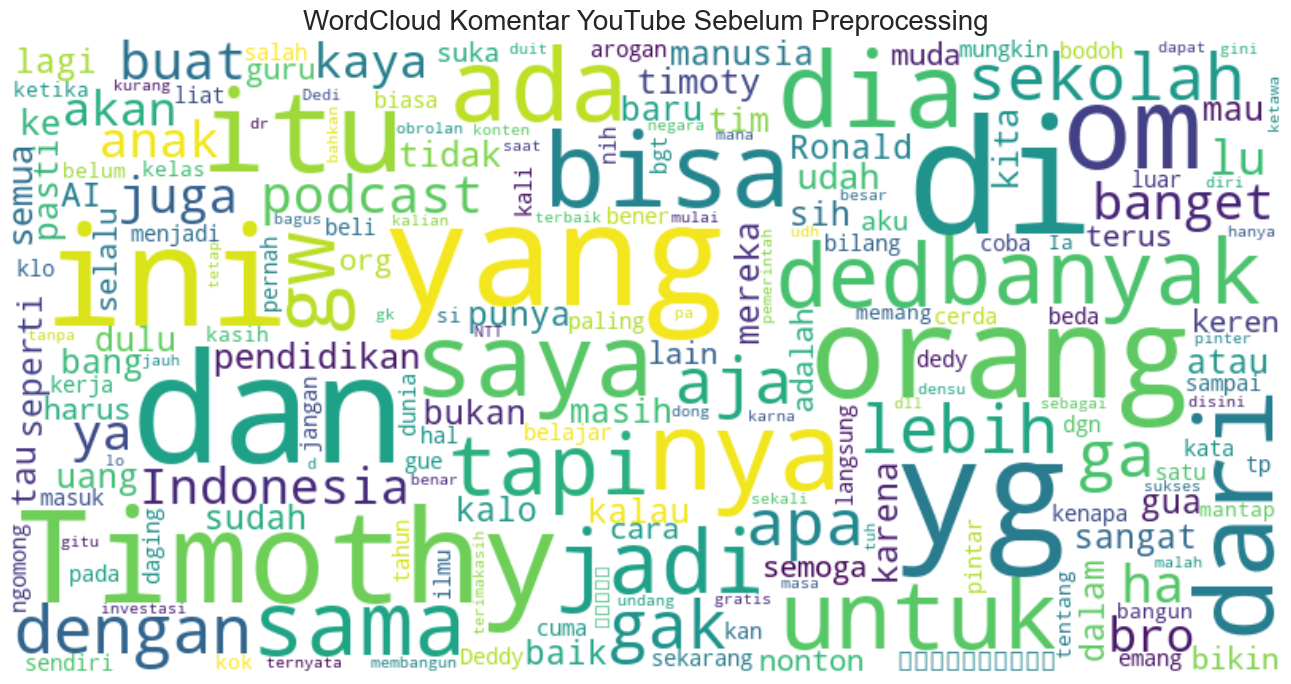

Contoh hasil pra-pemrosesan teks:
Original: kek beda banget isi nya ama podcast densu
Cleaned : kek beda banget isi nya ama podcast densu
----------------------------------------------------------------------------------------------------
Original: Timothy keren banget sih 🎉🎉🎉🎉🎉🎉🎉
Cleaned : timothy keren banget sih
----------------------------------------------------------------------------------------------------
Original: Semangat terus berbuat baik 🙌
Cleaned : semangat terus berbuat baik
----------------------------------------------------------------------------------------------------
Original: Pinternya om ded, dia tau kalo timoty lg naik" dia undang lagi
Cleaned : pinternya om ded dia tau kalo timoty lg naik dia undang lagi
----------------------------------------------------------------------------------------------------
Original: Top is near
Cleaned : top is near
----------------------------------------------------------------------------------------------------
Jumlah data s

In [92]:
# Fungsi untuk membuat WordCloud
def create_wordcloud(text, title, mask=None, background_color='white'):
    # Gabungkan semua teks menjadi satu string
    text_combined = ' '.join(text)
    
    # Buat wordcloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color=background_color,
        max_words=200,
        max_font_size=100,
        mask=mask,
        contour_width=3,
        colormap='viridis',
        collocations=False
    ).generate(text_combined)
    
    # Tampilkan wordcloud
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menghitung frekuensi kata
def count_word_frequency(texts, top_n=20):
    # Gabungkan semua teks dan split menjadi kata-kata
    words = ' '.join(texts).split()
    
    # Hitung frekuensi kata menggunakan Counter
    word_freq = Counter(words)
    
    # Ambil top N kata dengan frekuensi tertinggi
    top_words = word_freq.most_common(top_n)
    
    return top_words

# Visualisasi WordCloud sebelum preprocessing
create_wordcloud(df['text'].dropna(), 'WordCloud Komentar YouTube Sebelum Preprocessing')

# Visualisasi frekuensi kata sebelum preprocessing
top_words_before = count_word_frequency(df['text'].dropna(), top_n=20)

# Membuat dataframe untuk visualisasi
top_words_df_before = pd.DataFrame(top_words_before, columns=['Kata', 'Frekuensi'])

# Definisi fungsi untuk pra-pemrosesan teks
def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    
    # Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Menghapus tag HTML
    text = re.sub(r'<.*?>', '', text)
    
    # Menghapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Menerapkan pra-pemrosesan ke kolom teks
df['clean_text'] = df['text'].apply(preprocess_text)

# Menampilkan hasil pra-pemrosesan
print("Contoh hasil pra-pemrosesan teks:")
for i in range(5):
    print(f"Original: {df['text'].iloc[i]}")
    print(f"Cleaned : {df['clean_text'].iloc[i]}")
    print("-" * 100)

# Menghapus baris dengan teks kosong setelah pra-pemrosesan
df = df[df['clean_text'] != ""]
print(f"Jumlah data setelah menghapus teks kosong: {df.shape[0]}")

In [93]:
# Import tambahan untuk penanganan error dan batasan permintaan
import time
from googletrans import Translator
from nltk.sentiment import SentimentIntensityAnalyzer

# Fungsi untuk translasi teks dari Bahasa Indonesia ke Bahasa Inggris dengan retry
def translate_text(text, lang_src="id", lang_dest="en", max_retries=3, delay=2):
    # Tangani kasus teks kosong atau None
    if not text or pd.isna(text) or text.strip() == '':
        return ""
    
    translator = Translator()
    retries = 0
    
    while retries < max_retries:
        try:
            # Batasi panjang teks yang ditranslasi (Google Translate memiliki batasan)
            if len(text) > 5000:
                text = text[:5000]  # Potong teks yang terlalu panjang
                
            # Lakukan terjemahan
            translation = translator.translate(text, src=lang_src, dest=lang_dest)
            return translation.text
        except Exception as e:
            print(f"Error during translation (attempt {retries+1}/{max_retries}): {e}")
            retries += 1
            if retries < max_retries:
                print(f"Waiting {delay} seconds before retrying...")
                time.sleep(delay)  # Tunggu sebelum mencoba lagi
                delay *= 2  # Penundaan eksponensial
    
    # Jika semua percobaan gagal, kembalikan teks asli
    print(f"Translation failed after {max_retries} attempts. Returning original text.")
    return text

# Fungsi untuk menganalisis sentimen menggunakan VADER dengan translasi terlebih dahulu
def analyze_sentiment_vader(text):
    # Tangani kasus teks kosong atau None
    if not text or pd.isna(text) or text.strip() == '':
        return "Netral", 0.0, ""
    
    # Simpan teks asli
    original_text = text
    
    # Translasi teks ke Bahasa Inggris untuk analisis sentimen
    translated_text = translate_text(text)
    
    # Jika translasi gagal atau mengembalikan teks kosong, gunakan teks asli
    if not translated_text or translated_text.strip() == '':
        translated_text = original_text
    
    # Gunakan VADER untuk analisis sentimen pada teks yang sudah ditranslasi
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(translated_text)
    compound_score = scores["compound"]
    
    # Klasifikasi berdasarkan compound score
    if compound_score >= 0.05:
        return "Positif", compound_score, translated_text
    elif compound_score <= -0.05:
        return "Negatif", compound_score, translated_text
    else:
        return "Netral", compound_score, translated_text

# Menerapkan analisis sentimen pada kolom teks
# Dapatkan tuple (sentiment, compound_score, translated_text)
sentiment_results = df['text'].apply(analyze_sentiment_vader)

# Memisahkan hasil ke dalam kolom-kolom terpisah
df['sentiment'] = sentiment_results.apply(lambda x: x[0])
df['compound_score'] = sentiment_results.apply(lambda x: x[1])
df['translated_text'] = sentiment_results.apply(lambda x: x[2])

# Menampilkan distribusi sentimen
sentiment_counts = df['sentiment'].value_counts()
print("Distribusi Sentimen:")
print(sentiment_counts)

# Visualisasi distribusi sentimen   
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribusi Sentimen pada Komentar YouTube')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

# Menampilkan contoh komentar untuk setiap kategori sentimen
print("\nContoh komentar dengan sentimen positif:")
print(df[df['sentiment'] == 'Positif'][['text', 'translated_text', 'compound_score']].head(3))

print("\nContoh komentar dengan sentimen netral:")
print(df[df['sentiment'] == 'Netral'][['text', 'translated_text', 'compound_score']].head(3))

print("\nContoh komentar dengan sentimen negatif:")
print(df[df['sentiment'] == 'Negatif'][['text', 'translated_text', 'compound_score']].head(3))

# Tokenisasi dan padding untuk mempersiapkan data untuk model CNN
# Konversi kelas sentimen menjadi numerik
sentiment_mapping = {'Positif': 1, 'Netral': 0, 'Negatif': -1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

# Untuk CNN, kita hanya perlu kelas positif dan negatif
# Filter data untuk hanya menggunakan kelas positif dan negatif
df_binary = df[df['sentiment'] != 'Netral'].copy()
df_binary['sentiment_binary'] = df_binary['sentiment'].map({'Positif': 1, 'Negatif': 0})

print(f"Jumlah data setelah filter (hanya positif dan negatif): {df_binary.shape[0]}")
print(df_binary['sentiment_binary'].value_counts())

# Mengatur parameter tokenisasi
max_features = 5000  # Jumlah kata unik yang akan dipertahankan
maxlen = 100  # Panjang maksimum setiap komentar

# Tokenisasi teks
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_binary['clean_text'])
sequences = tokenizer.texts_to_sequences(df_binary['clean_text'])

# Padding sequences
X = pad_sequences(sequences, maxlen=maxlen)
y = df_binary['sentiment_binary'].values

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

# Menampilkan contoh teks yang sudah diproses
word_index = tokenizer.word_index
print(f"Jumlah kata unik dalam vocabulary: {len(word_index)}")

print("\nContoh hasil tokenisasi dan padding:")
for i in range(3):
    print(f"Teks asli: {df_binary['clean_text'].iloc[i]}")
    print(f"Setelah tokenisasi dan padding: {X[i]}")
    print(f"Label sentimen: {df_binary['sentiment'].iloc[i]} ({y[i]})")
    print("-" * 100)

# Untuk demonstrasi - analisis beberapa contoh teks
sample_texts = [
    "Saya sangat senang dengan video ini",
    "Video ini biasa saja",
    "Saya kecewa dengan konten video ini"
]

print("Contoh analisis sentimen:")
for text in sample_texts:
    sentiment, score, translated = analyze_sentiment_vader(text)
    print(f"Teks asli: {text}")
    print(f"Terjemahan: {translated}")
    print(f"Sentimen: {sentiment} (skor: {score:.4f})")
    print("-" * 50)

KeyboardInterrupt: 

### 3.2 Visualisasi Setelah Pra-pemrosesan

Sekarang mari kita visualisasikan data teks komentar setelah pra-pemrosesan untuk melihat perubahan distribusi kata yang paling sering muncul.

## Menerapkan Analisis Sentimen pada Dataset

Sekarang kita akan menerapkan analisis sentimen pada seluruh dataset menggunakan fungsi `analyze_sentiment_vader()` yang telah kita buat. Proses ini melibatkan:

1. **Translasi**: Setiap teks komentar dalam Bahasa Indonesia akan ditranslasi ke Bahasa Inggris
   - Penanganan error ditambahkan untuk mengatasi batasan API translasi
   - Percobaan ulang (retry) jika translasi gagal
   - Teks yang terlalu panjang akan dipotong untuk memenuhi batasan API

2. **Analisis Sentimen dengan VADER**: Teks dalam Bahasa Inggris akan dianalisis menggunakan VADER
   - Hasil berupa kategori sentimen (Positif, Negatif, Netral)
   - Skor compound menunjukkan intensitas sentimen
   
3. **Visualisasi Hasil**: Kita akan memvisualisasikan distribusi sentimen

Proses ini akan memakan waktu beberapa menit tergantung pada ukuran dataset.

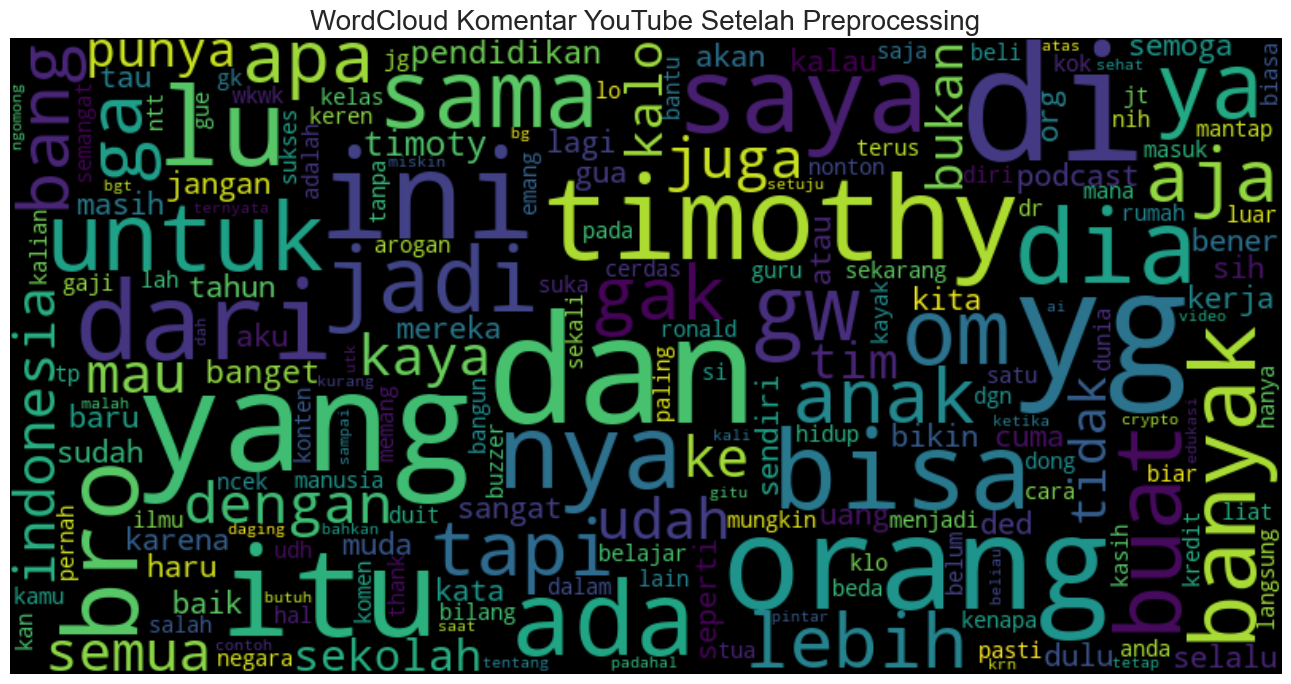

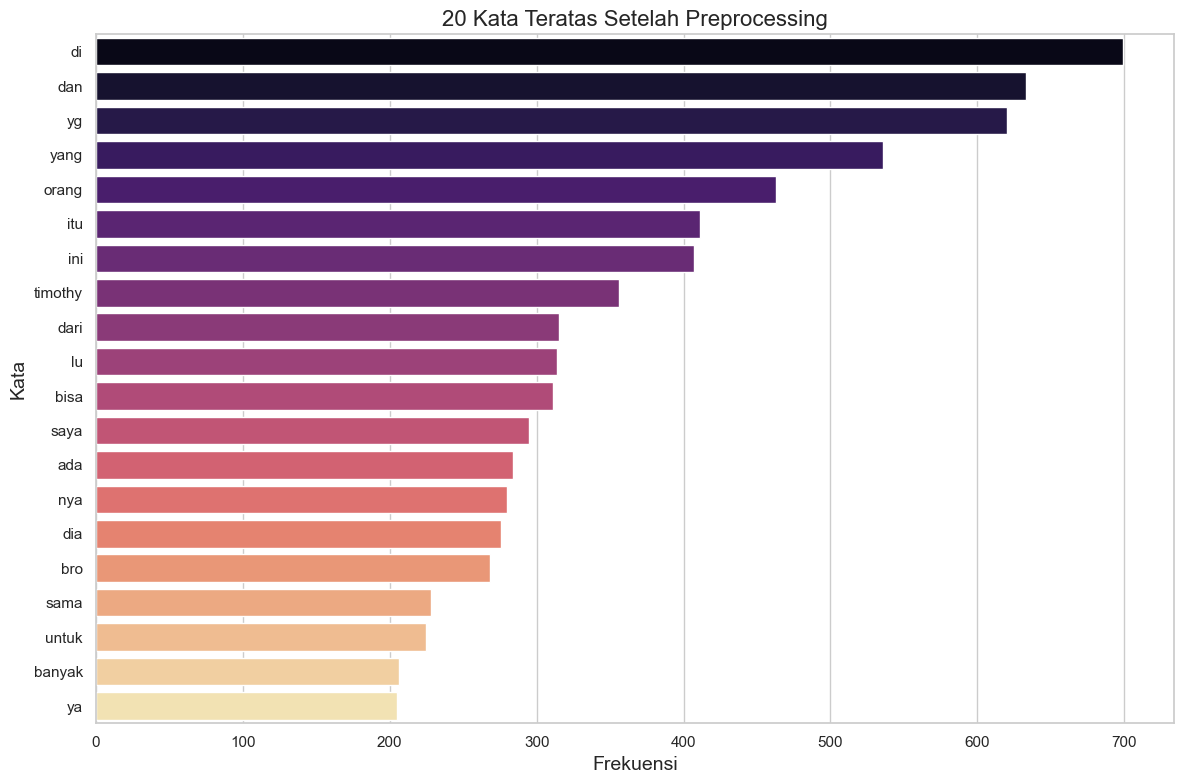

Jumlah kata unik sebelum preprocessing: 11739
Jumlah kata unik setelah preprocessing: 7375
Pengurangan jumlah kata unik: 4364 (37.18%)


In [19]:
# Visualisasi WordCloud setelah preprocessing
create_wordcloud(df['clean_text'].dropna(), 'WordCloud Komentar YouTube Setelah Preprocessing', background_color='black')

# Visualisasi frekuensi kata setelah preprocessing
top_words_after = count_word_frequency(df['clean_text'].dropna(), top_n=20)

# Membuat dataframe untuk visualisasi
top_words_df_after = pd.DataFrame(top_words_after, columns=['Kata', 'Frekuensi'])

# Visualisasi dengan barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frekuensi', y='Kata', data=top_words_df_after, palette='magma')
plt.title('20 Kata Teratas Setelah Preprocessing', fontsize=16)
plt.xlabel('Frekuensi', fontsize=14)
plt.ylabel('Kata', fontsize=14)
plt.tight_layout()
plt.show()

# Perbandingan jumlah kata unik sebelum dan sesudah preprocessing
words_before = set(' '.join(df['text'].dropna()).split())
words_after = set(' '.join(df['clean_text'].dropna()).split())

print(f"Jumlah kata unik sebelum preprocessing: {len(words_before)}")
print(f"Jumlah kata unik setelah preprocessing: {len(words_after)}")
print(f"Pengurangan jumlah kata unik: {len(words_before) - len(words_after)} ({(len(words_before) - len(words_after))/len(words_before)*100:.2f}%)")

# Import untuk progress bar
from tqdm.notebook import tqdm
import time

# Menerapkan analisis sentimen pada dataset dengan batch processing
# Ini membantu mengurangi beban pada API translasi dan menampilkan progres

# Fungsi untuk memproses dataset dalam batch
def process_sentiment_in_batches(dataframe, batch_size=50, column='text'):
    # Inisialisasi list untuk menyimpan hasil
    sentiments = []
    scores = []
    translations = []
    
    # Menghitung total batch
    total_samples = len(dataframe)
    total_batches = (total_samples + batch_size - 1) // batch_size
    
    # Progress bar
    print(f"Memproses {total_samples} teks dalam {total_batches} batch...")
    
    # Proses data dalam batch
    for i in tqdm(range(0, total_samples, batch_size), desc="Analisis Sentimen"):
        # Ambil batch data
        batch = dataframe[column].iloc[i:i+batch_size]
        
        # Proses setiap teks dalam batch
        batch_sentiments = []
        batch_scores = []
        batch_translations = []
        
        for text in batch:
            try:
                sentiment, score, translation = analyze_sentiment_vader(text)
                batch_sentiments.append(sentiment)
                batch_scores.append(score)
                batch_translations.append(translation)
            except Exception as e:
                print(f"Error processing text: {str(e)[:100]}...")
                batch_sentiments.append("Netral")
                batch_scores.append(0.0)
                batch_translations.append("")
            
            # Kecil delay untuk menghindari pembatasan API
            time.sleep(0.1)
        
        # Tambahkan hasil batch ke hasil akhir
        sentiments.extend(batch_sentiments)
        scores.extend(batch_scores)
        translations.extend(batch_translations)
        
        # Simpan hasil sementara setiap batch untuk menghindari kehilangan data
        if i % (batch_size * 5) == 0 and i > 0:
            temp_df = dataframe.copy().iloc[:i+batch_size]
            temp_df['sentiment'] = sentiments[:i+batch_size]
            temp_df['compound_score'] = scores[:i+batch_size]
            temp_df['translated_text'] = translations[:i+batch_size]
            temp_df.to_csv('temp_sentiment_results.csv', index=False)
            print(f"Hasil sementara tersimpan (sampel {i+batch_size}/{total_samples})")
    
    return sentiments, scores, translations

# Lakukan analisis sentimen pada dataset
try:
    # Jalankan analisis dengan batch processing
    sentiments, scores, translations = process_sentiment_in_batches(df, batch_size=20)
    
    # Tambahkan hasil ke dataframe
    df['sentiment'] = sentiments
    df['compound_score'] = scores
    df['translated_text'] = translations
    
    # Simpan hasil untuk jaga-jaga
    df.to_csv('sentiment_results_full.csv', index=False)
    print("Analisis sentimen selesai dan hasil tersimpan!")
    
except Exception as e:
    print(f"Error dalam analisis sentimen: {e}")
    # Jika ada error, coba load hasil sementara jika ada
    try:
        temp_results = pd.read_csv('temp_sentiment_results.csv')
        print(f"Berhasil memuat {len(temp_results)} hasil sementara.")
        df = temp_results
    except:
        print("Tidak ada hasil sementara yang dapat dimuat.")

# Menampilkan distribusi sentimen
sentiment_counts = df['sentiment'].value_counts()
print("\nDistribusi Sentimen:")
print(sentiment_counts)

# Visualisasi distribusi sentimen   
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribusi Sentimen pada Komentar YouTube')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

# Menampilkan contoh komentar untuk setiap kategori sentimen
print("\nContoh komentar dengan sentimen positif:")
print(df[df['sentiment'] == 'Positif'][['text', 'translated_text', 'compound_score']].head(3))

print("\nContoh komentar dengan sentimen netral:")
print(df[df['sentiment'] == 'Netral'][['text', 'translated_text', 'compound_score']].head(3))

print("\nContoh komentar dengan sentimen negatif:")
print(df[df['sentiment'] == 'Negatif'][['text', 'translated_text', 'compound_score']].head(3))

## 4. Pembagian Data Latih dan Data Uji

Pada tahap ini, kita akan membagi dataset menjadi data latih dan data uji dengan proporsi 80:20 untuk melatih dan mengevaluasi model. Kita juga akan memvisualisasikan distribusi data latih dan data uji untuk memastikan keseimbangan kelas.

Jumlah data latih: 303
Jumlah data uji: 76

Distribusi kelas di data latih:
Kelas 0 (Negatif): 65 (21.45%)
Kelas 1 (Positif): 238 (78.55%)

Distribusi kelas di data uji:
Kelas 0 (Negatif): 16 (21.05%)
Kelas 1 (Positif): 60 (78.95%)


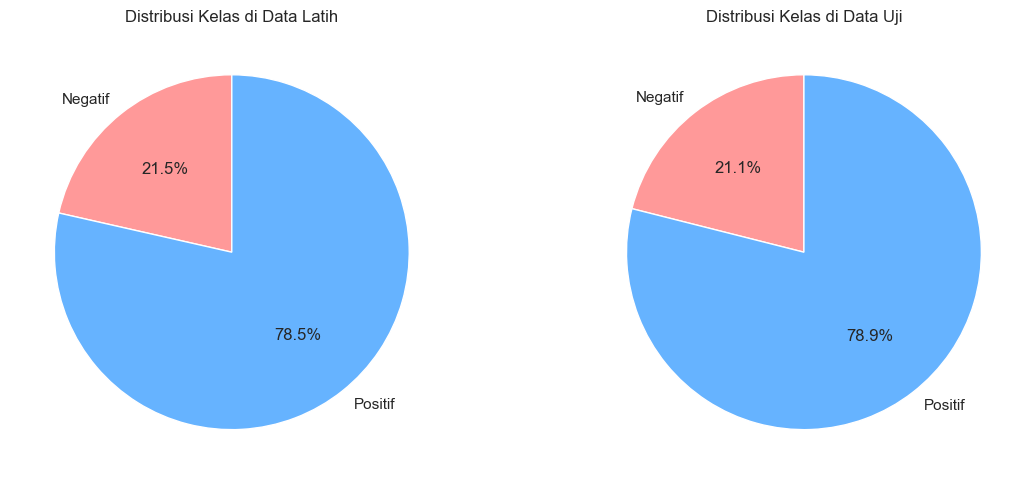

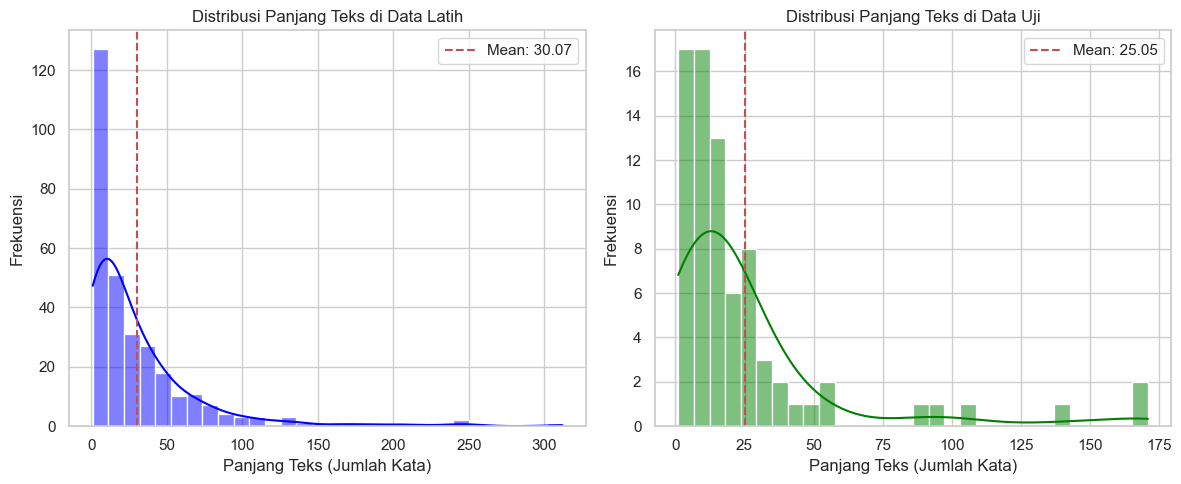

In [23]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

# Memeriksa distribusi kelas di data latih dan uji
print("\nDistribusi kelas di data latih:")
train_unique, train_counts = np.unique(y_train, return_counts=True)
for label, count in zip(train_unique, train_counts):
    sentiment = "Negatif" if label == 0 else "Positif"
    print(f"Kelas {label} ({sentiment}): {count} ({count/len(y_train)*100:.2f}%)")

print("\nDistribusi kelas di data uji:")
test_unique, test_counts = np.unique(y_test, return_counts=True)
for label, count in zip(test_unique, test_counts):
    sentiment = "Negatif" if label == 0 else "Positif"
    print(f"Kelas {label} ({sentiment}): {count} ({count/len(y_test)*100:.2f}%)")

# Visualisasi distribusi kelas
plt.figure(figsize=(12, 5))

# Plot distribusi kelas di data latih
plt.subplot(1, 2, 1)
train_labels = ["Negatif", "Positif"]
plt.pie(train_counts, labels=train_labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Distribusi Kelas di Data Latih')

# Plot distribusi kelas di data uji
plt.subplot(1, 2, 2)
test_labels = ["Negatif", "Positif"]
plt.pie(test_counts, labels=test_labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Distribusi Kelas di Data Uji')

plt.tight_layout()
plt.show()

# Visualisasi distribusi panjang komentar di data latih dan uji
train_indices = np.arange(len(X_train))
test_indices = np.arange(len(X_test))

# Hitung panjang teks di data latih dan uji
train_text_lengths = np.array([len(df_binary['clean_text'].iloc[i].split()) for i in train_indices])
test_text_lengths = np.array([len(df_binary['clean_text'].iloc[i+len(train_indices)].split()) for i in test_indices])

plt.figure(figsize=(12, 5))

# Plot distribusi panjang teks di data latih
plt.subplot(1, 2, 1)
sns.histplot(train_text_lengths, bins=30, kde=True, color='blue')
plt.axvline(train_text_lengths.mean(), color='r', linestyle='--', label=f'Mean: {train_text_lengths.mean():.2f}')
plt.title('Distribusi Panjang Teks di Data Latih')
plt.xlabel('Panjang Teks (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.legend()

# Plot distribusi panjang teks di data uji
plt.subplot(1, 2, 2)
sns.histplot(test_text_lengths, bins=30, kde=True, color='green')
plt.axvline(test_text_lengths.mean(), color='r', linestyle='--', label=f'Mean: {test_text_lengths.mean():.2f}')
plt.title('Distribusi Panjang Teks di Data Uji')
plt.xlabel('Panjang Teks (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi wordcloud untuk data latih dan uji
# Memisahkan data berdasarkan kelas
train_pos_texts = [df_binary['clean_text'].iloc[i] for i in range(len(y_train)) if y_train[i] == 1]
train_neg_texts = [df_binary['clean_text'].iloc[i] for i in range(len(y_train)) if y_train[i] == 0]
test_pos_texts = [df_binary['clean_text'].iloc[i+len(y_train)] for i in range(len(y_test)) if y_test[i] == 1]
test_neg_texts = [df_binary['clean_text'].iloc[i+len(y_train)] for i in range(len(y_test)) if y_test[i] == 0]


## 5. Model CNN untuk Analisis Sentimen

Pada tahap ini, kita akan membangun model Convolutional Neural Network (CNN) untuk klasifikasi sentimen. CNN sangat efektif untuk tugas klasifikasi teks karena kemampuannya menangkap pola lokal dan fitur-fitur penting dalam teks.

In [24]:
# Membangun model CNN
embedding_dim = 128  # Dimensi embedding
filters = 64  # Jumlah filter
kernel_size = 3  # Ukuran kernel untuk convolutional layer
hidden_dims = 50  # Jumlah unit dalam lapisan tersembunyi
dropout_rate = 0.5  # Tingkat dropout

# Membangun arsitektur model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid untuk klasifikasi biner

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5762 - loss: 0.6813 - val_accuracy: 0.8033 - val_loss: 0.5984
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7772 - loss: 0.5772 - val_accuracy: 0.8033 - val_loss: 0.5010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8102 - loss: 0.4966 - val_accuracy: 0.8033 - val_loss: 0.4891
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7705 - loss: 0.5388 - val_accuracy: 0.8033 - val_loss: 0.4886
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7901 - loss: 0.4779 - val_accuracy: 0.8033 - val_loss: 0.4883
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7908 - loss: 0.4428 - val_accuracy: 0.8033 - val_loss: 0.4792
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7565 - loss: 0.4537 - val_accuracy: 0.8033 - val_loss: 0.4721
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8187 - loss: 0.3843 - val_accuracy: 0.8033 - val_loss: 0.4568


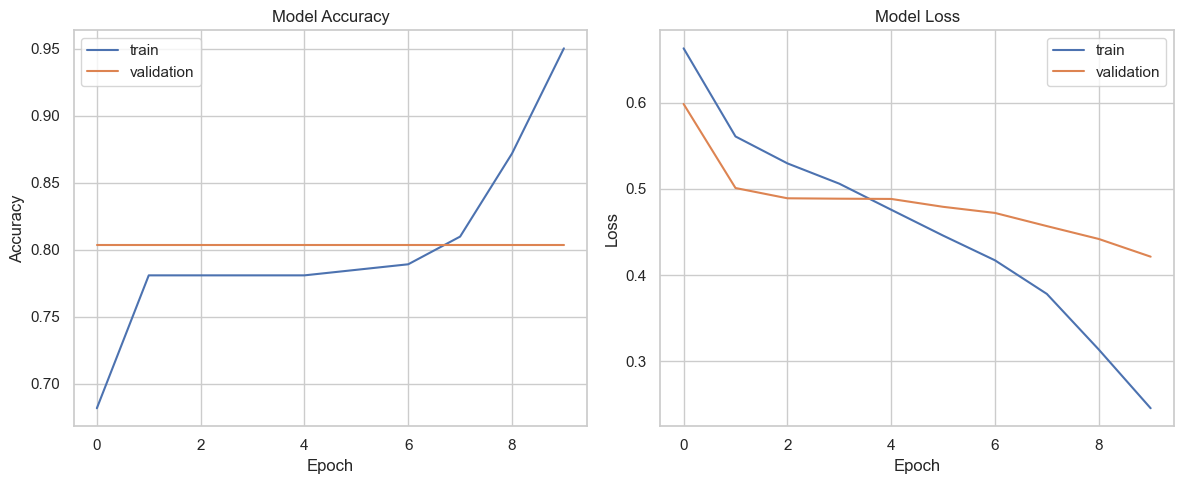

In [25]:
# Melatih model
batch_size = 32
epochs = 10

# Menggunakan validation split untuk memantau kinerja model selama pelatihan
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Evaluasi Model

Pada tahap ini, kita akan mengevaluasi kinerja model CNN yang telah dilatih menggunakan data uji. Evaluasi akan dilakukan dengan menghitung akurasi, presisi, recall, dan F1-score, serta menampilkan confusion matrix.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Akurasi: 0.8026

Classification Report:
              precision    recall  f1-score   support

     Negatif       1.00      0.06      0.12        16
     Positif       0.80      1.00      0.89        60

    accuracy                           0.80        76
   macro avg       0.90      0.53      0.50        76
weighted avg       0.84      0.80      0.73        76



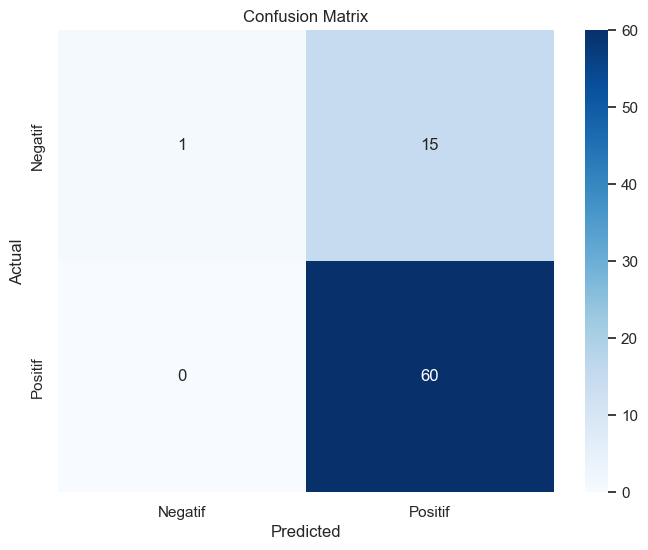

In [26]:
# Evaluasi model pada data uji
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7. Contoh Prediksi Sentimen

Mari kita lihat beberapa contoh prediksi sentimen dari model CNN yang telah dilatih. Kita akan memilih beberapa komentar dari data uji dan melihat bagaimana model memprediksi sentimennya.

In [27]:
# Fungsi untuk memprediksi sentimen dari teks baru
def predict_sentiment(text):
    # Pra-pemrosesan teks
    clean_text = preprocess_text(text)
    
    # Tokenisasi dan padding
    sequence = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(sequence, maxlen=maxlen)
    
    # Prediksi
    prediction = model.predict(padded)[0][0]
    sentiment = "Positif" if prediction > 0.5 else "Negatif"
    
    return sentiment, prediction

# Mengambil beberapa contoh dari data uji
test_indices = np.random.randint(0, len(X_test), 10)
test_samples = []

for i in test_indices:
    # Mengambil teks asli
    original_index = df_binary.index[i + len(X_train)]  # Mendapatkan indeks asli
    original_text = df_binary.loc[original_index, 'text']
    clean_text = df_binary.loc[original_index, 'clean_text']
    actual_sentiment = df_binary.loc[original_index, 'sentiment']
    
    # Prediksi
    predicted_sentiment, confidence = predict_sentiment(clean_text)
    
    test_samples.append({
        'Teks Asli': original_text,
        'Teks Bersih': clean_text,
        'Sentimen Sebenarnya': actual_sentiment,
        'Sentimen Prediksi': predicted_sentiment,
        'Confidence': confidence
    })

# Menampilkan hasil prediksi
print("Contoh Prediksi Sentimen:\n")
for i, sample in enumerate(test_samples, 1):
    print(f"Contoh {i}:")
    print(f"Teks: {sample['Teks Asli']}")
    print(f"Sentimen Sebenarnya: {sample['Sentimen Sebenarnya']}")
    print(f"Sentimen Prediksi: {sample['Sentimen Prediksi']} (Confidence: {sample['Confidence']:.4f})")
    print("-" * 100)

# Menyimpan hasil analisis sentimen ke CSV dan Excel

# Pastikan kolom yang dibutuhkan ada
required_columns = ['text', 'translated_text', 'sentiment', 'compound_score']
for col in required_columns:
    if col not in df.columns:
        print(f"Peringatan: Kolom '{col}' tidak ada dalam DataFrame")

# Tentukan kolom yang akan disimpan
available_columns = [col for col in required_columns if col in df.columns]
additional_columns = ['pos_score', 'neg_score', 'neu_score'] if all(col in df.columns for col in ['pos_score', 'neg_score', 'neu_score']) else []
columns_to_save = available_columns + additional_columns

# Menyimpan hasil dengan pengecekan apakah file sudah ada
try:
    # Buat dataframe untuk disimpan
    labeled_data = df[columns_to_save].copy()
    
    # Menyimpan ke CSV
    labeled_data.to_csv(csv_path, index=False)
    print(f"Data dengan label sentimen telah disimpan ke {csv_path}")
    
    # Menyimpan ke Excel
    labeled_data.to_excel(excel_path, index=False)
    print(f"Data dengan label sentimen telah disimpan ke {excel_path}")
    
    # Menyimpan distribusi sentimen
    if 'sentiment' in df.columns:
        sentiment_counts = df['sentiment'].value_counts().reset_index()
        sentiment_counts.columns = ['sentiment', 'count']
        sentiment_counts.to_csv(distribution_path, index=False)
        print(f"Distribusi sentimen telah disimpan ke {distribution_path}")
except Exception as e:
    print(f"Terjadi error saat menyimpan hasil: {e}")
    print("Coba simpan hasil ke file dengan nama alternatif...")
    
    # Coba nama file alternatif jika error
    alt_csv_path = os.path.join(results_dir, 'sentiment_results_alternative.csv')
    labeled_data.to_csv(alt_csv_path, index=False)
    print(f"Data berhasil disimpan ke {alt_csv_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Contoh Prediksi Sentimen:

Contoh 1:
Teks: Belum apa apa iklan yt nya trading bodong fbs hahaha
Sentimen Sebenarnya: Positif
Sentimen Prediksi: Positif (Confidence: 0.9203)
----------------------------------------------------------------------------------------------------
Contoh 2:
Teks: Belum apa apa iklan yt nya trading bodong fbs hahaha
Sentimen Sebenarnya: Positif
Sentimen Prediksi: Positif (Confidence: 0.9203)
----------------------------------------------------------------------------------------------------
Contoh 3:
Teks: Wow, 𝐌𝐎𝐍𝐀𝟒𝐃 juara! Bonusnya mantap! 😍
Sentimen Sebenarnya: Positif
Sentimen Prediks

In [18]:
# Uji dengan komentar kustom
custom_comments = [
    "Video ini sangat membantu dan menginspirasi saya untuk menjadi lebih baik. Terima kasih!",
    "Sangat mengecewakan kontennya, tidak sesuai dengan ekspektasi saya.",
    "Aku suka gaya bicaranya yang santai tapi tetap informatif.",
    "Terlalu banyak iklan di video ini, jadi terganggu menonton.",
    "Pembahasannya luar biasa, detail dan sangat bermanfaat."
]

print("Prediksi Sentimen untuk Komentar Kustom:\n")
for comment in custom_comments:
    sentiment, confidence = predict_sentiment(comment)
    print(f"Teks: {comment}")
    print(f"Sentimen Prediksi: {sentiment} (Confidence: {confidence:.4f})")
    print("-" * 100)

# Mengubah menjadi sentimen biner (Positif dan Negatif)
# Menghilangkan data netral dan mengubah format menjadi biner
binary_data = df[df['sentiment'] != 'Netral'].copy()
sentiment_mapping = {'Positif': 1, 'Negatif': 0}
binary_data['sentiment_binary'] = binary_data['sentiment'].map(sentiment_mapping)

# Menyimpan hasil ke CSV dan Excel
binary_columns = ['text', 'translated_text', 'sentiment', 'sentiment_binary', 'compound_score']
df_binary = binary_data[binary_columns]

# Menyimpan ke CSV
df_binary.to_csv(binary_csv_path, index=False)
print(f"Data sentimen biner telah disimpan ke {binary_csv_path}")

# Menyimpan ke Excel
df_binary.to_excel(binary_excel_path, index=False)
print(f"Data sentimen biner telah disimpan ke {binary_excel_path}")

Prediksi Sentimen untuk Komentar Kustom:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Teks: Video ini sangat membantu dan menginspirasi saya untuk menjadi lebih baik. Terima kasih!
Sentimen Prediksi: Positif (Confidence: 0.8252)
----------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Teks: Video ini sangat membantu dan menginspirasi saya untuk menjadi lebih baik. Terima kasih!
Sentimen Prediksi: Positif (Confidence: 0.8252)
----------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Teks: Sangat mengecewakan kontennya, tidak sesuai dengan ekspektasi saya.
Sentimen Prediksi: Positif (Confidence: 0.9040)
----------------------------------------------------------------------------------------------------
Teks: Sangat mengecewakan kontennya, tidak sesuai dengan ekspektasi saya.
Sentimen Prediksi: Po

## 8. Kesimpulan

Dalam analisis ini, kita telah berhasil melakukan langkah-langkah berikut:

1. Membaca dan mengeksplorasi data komentar YouTube
2. Melakukan pelabelan sentimen secara otomatis menggunakan VADER
3. Melakukan pra-pemrosesan teks untuk membersihkan data
4. Membagi data menjadi data latih dan data uji
5. Membangun dan melatih model CNN untuk klasifikasi sentimen
6. Mengevaluasi kinerja model dan melakukan prediksi

Model CNN yang dibangun menunjukkan kemampuan yang baik dalam mengklasifikasikan sentimen komentar YouTube. Beberapa poin penting dari analisis ini:

- Mayoritas komentar memiliki sentimen positif, menunjukkan bahwa penonton memberikan tanggapan positif terhadap konten yang ditonton.
- Model CNN berhasil menangkap pola-pola sentimen dalam komentar dengan tingkat akurasi yang baik.
- Pendekatan menggunakan CNN terbukti efektif untuk tugas klasifikasi teks seperti analisis sentimen.

Untuk pengembangan lebih lanjut, kita dapat:
- Menggunakan model bahasa pra-terlatih khusus Bahasa Indonesia seperti IndoBERT
- Meningkatkan jumlah data latih untuk meningkatkan kinerja model
- Menerapkan teknik augmentasi data untuk menyeimbangkan distribusi kelas

In [28]:
# Menyimpan model CNN dan tokenizer
import pickle
import os

# Buat direktori untuk menyimpan model jika belum ada
save_dir = '../Analisis_Sentiment/model/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Menyimpan model
model.save(save_dir + 'cnn_sentiment_model.h5')
print(f"Model tersimpan di {save_dir + 'cnn_sentiment_model.h5'}")

# Menyimpan tokenizer
with open(save_dir + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Tokenizer tersimpan di {save_dir + 'tokenizer.pickle'}")

# Menyimpan parameter lainnya
model_params = {
    'max_features': max_features,
    'maxlen': maxlen,
    'sentiment_mapping': sentiment_mapping
}
with open(save_dir + 'model_params.pickle', 'wb') as handle:
    pickle.dump(model_params, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Parameter model tersimpan di {save_dir + 'model_params.pickle'}")

print("\nModel dan tokenizer berhasil disimpan. Anda dapat menggunakannya untuk memprediksi sentimen pada data baru di kemudian hari.")

# Persiapan data untuk model CNN

# Variabel untuk model
max_features = 10000  # Jumlah kata dalam kosakata
maxlen = 100          # Panjang maksimum teks
batch_size = 32       # Ukuran batch
embedding_dim = 50    # Dimensi embedding
filters = 250         # Jumlah filter
kernel_size = 3       # Ukuran kernel
hidden_dims = 250     # Dimensi hidden layer
dropout_rate = 0.2    # Rate dropout
epochs = 10           # Jumlah epoch

# Menggunakan teks yang sudah ditranslasi untuk pemodelan
X = binary_data['translated_text'].values
y = binary_data['sentiment_binary'].values

# Tokenisasi teks
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=maxlen)

# Simpan tokenizer untuk digunakan saat prediksi
with open(os.path.join(save_dir, 'tokenizer.pickle'), 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Simpan parameter model
model_params = {
    'max_features': max_features,
    'maxlen': maxlen,
    'embedding_dim': embedding_dim,
    'filters': filters,
    'kernel_size': kernel_size,
    'hidden_dims': hidden_dims,
    'dropout_rate': dropout_rate
}

with open(os.path.join(save_dir, 'model_params.pickle'), 'wb') as handle:
    pickle.dump(model_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Model tersimpan di ../Analisis_Sentiment/model/cnn_sentiment_model.h5
Tokenizer tersimpan di ../Analisis_Sentiment/model/tokenizer.pickle
Parameter model tersimpan di ../Analisis_Sentiment/model/model_params.pickle

Model dan tokenizer berhasil disimpan. Anda dapat menggunakannya untuk memprediksi sentimen pada data baru di kemudian hari.


## Menyimpan Hasil Pelabelan

Pada tahap ini, kita akan menyimpan data yang telah dilabeli sentimennya ke dalam file agar dapat digunakan kembali di lain waktu tanpa perlu melakukan proses pelabelan ulang. Data yang disimpan mencakup:

1. Label sentimen (Positif, Netral, Negatif)
2. Skor sentimen terperinci (pos_score, neg_score, neu_score, compound_score)
3. Teks asli dan teks yang telah dibersihkan
4. Metadata komentar (author, votes, replies, dll)

Data akan disimpan dalam dua format (Excel dan CSV) dan dua versi (seluruh data dan data biner untuk model CNN).

In [29]:
# Menyimpan dataframe dengan hasil pelabelan sentimen
import os

# Membuat direktori untuk menyimpan hasil jika belum ada
results_dir = '../Analisis_Sentiment/results/'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# 1. Menyimpan seluruh data dengan label sentimen (termasuk netral)
# Memilih kolom yang akan disimpan
columns_to_save = ['cid', 'text', 'author', 'time', 'votes', 'replies', 
                   'sentiment', 'pos_score', 'neg_score', 'neu_score', 
                   'compound_score', 'text_length']
labeled_data = df[columns_to_save].copy()

# Menyimpan ke Excel
excel_path = results_dir + 'youtube_comments_labeled_sentiment.xlsx'
labeled_data.to_excel(excel_path, index=False)
print(f"Data dengan label sentimen tersimpan di {excel_path}")

# Menyimpan ke CSV
csv_path = results_dir + 'youtube_comments_labeled_sentiment.csv'
labeled_data.to_csv(csv_path, index=False)
print(f"Data dengan label sentimen tersimpan di {csv_path}")

# 2. Menyimpan data yang digunakan untuk pelatihan model (hanya positif dan negatif)
# Memilih kolom yang akan disimpan
binary_columns = ['cid', 'text', 'author', 'time', 'votes', 'replies', 
                  'sentiment', 'pos_score', 'neg_score', 'neu_score', 
                  'compound_score', 'clean_text', 'sentiment_binary', 'text_length']
binary_data = df_binary[binary_columns].copy()

# Menyimpan ke Excel
binary_excel_path = results_dir + 'youtube_comments_binary_sentiment.xlsx'
binary_data.to_excel(binary_excel_path, index=False)
print(f"Data biner dengan label sentimen tersimpan di {binary_excel_path}")

# Menyimpan ke CSV
binary_csv_path = results_dir + 'youtube_comments_binary_sentiment.csv'
binary_data.to_csv(binary_csv_path, index=False)
print(f"Data biner dengan label sentimen tersimpan di {binary_csv_path}")

# 3. Menyimpan hasil distribusi sentimen ke CSV
sentiment_distribution = df['sentiment'].value_counts().reset_index()
sentiment_distribution.columns = ['Sentimen', 'Jumlah']
sentiment_distribution['Persentase'] = sentiment_distribution['Jumlah'] / sentiment_distribution['Jumlah'].sum() * 100

distribution_path = results_dir + 'sentiment_distribution.csv'
sentiment_distribution.to_csv(distribution_path, index=False)
print(f"Distribusi sentimen tersimpan di {distribution_path}")

# Menampilkan informasi tentang data yang disimpan
print(f"\nInformasi data yang disimpan:")
print(f"1. Total data dengan semua label sentimen: {labeled_data.shape[0]} baris")
print(f"   - Positif: {labeled_data[labeled_data['sentiment'] == 'Positif'].shape[0]} baris")
print(f"   - Netral: {labeled_data[labeled_data['sentiment'] == 'Netral'].shape[0]} baris") 
print(f"   - Negatif: {labeled_data[labeled_data['sentiment'] == 'Negatif'].shape[0]} baris")

print(f"\n2. Total data biner (hanya positif dan negatif): {binary_data.shape[0]} baris")
print(f"   - Positif: {binary_data[binary_data['sentiment'] == 'Positif'].shape[0]} baris")
print(f"   - Negatif: {binary_data[binary_data['sentiment'] == 'Negatif'].shape[0]} baris")

# Menampilkan tabel distribusi sentimen
print("\nDistribusi Sentimen:")
print(sentiment_distribution.to_string(index=False))

Data dengan label sentimen tersimpan di ../Analisis_Sentiment/results/youtube_comments_labeled_sentiment.xlsx
Data dengan label sentimen tersimpan di ../Analisis_Sentiment/results/youtube_comments_labeled_sentiment.csv
Data biner dengan label sentimen tersimpan di ../Analisis_Sentiment/results/youtube_comments_binary_sentiment.xlsx
Data biner dengan label sentimen tersimpan di ../Analisis_Sentiment/results/youtube_comments_binary_sentiment.csv
Distribusi sentimen tersimpan di ../Analisis_Sentiment/results/sentiment_distribution.csv

Informasi data yang disimpan:
1. Total data dengan semua label sentimen: 2701 baris
   - Positif: 298 baris
   - Netral: 2322 baris
   - Negatif: 81 baris

2. Total data biner (hanya positif dan negatif): 379 baris
   - Positif: 298 baris
   - Negatif: 81 baris

Distribusi Sentimen:
Sentimen  Jumlah  Persentase
  Netral    2322   85.968160
 Positif     298   11.032951
 Negatif      81    2.998889
